In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [0]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [0]:
df = pd.read_csv('stockdata.csv')

In [8]:
print(df)

            Date    Open    High  ...   Close  Total Trade Quantity  Turnover (Lacs)
0     2018-10-08  208.00  222.25  ...  215.15             4642146.0         10062.83
1     2018-10-05  217.00  218.60  ...  209.20             3519515.0          7407.06
2     2018-10-04  223.50  227.80  ...  218.20             1728786.0          3815.79
3     2018-10-03  230.00  237.50  ...  227.60             1708590.0          3960.27
4     2018-10-01  234.55  234.60  ...  230.90             1534749.0          3486.05
...          ...     ...     ...  ...     ...                   ...              ...
1230  2013-10-14  160.85  161.45  ...  159.45             1281419.0          2039.09
1231  2013-10-11  161.15  163.45  ...  160.05             1880046.0          3030.76
1232  2013-10-10  156.00  160.80  ...  160.15             3124853.0          4978.80
1233  2013-10-09  155.70  158.20  ...  155.55             2049580.0          3204.49
1234  2013-10-08  157.00  157.80  ...  155.80             1720413

In [0]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format = '%Y-%m-%d')
df.index = df['Date']

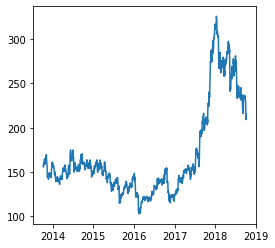

In [12]:
plt.figure(figsize=(4,4))
plt.plot(df['Close'],label = 'Close Price History')

In [0]:
#Create dataFrame with date & traget var
data = df.sort_index(ascending=True)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])

for i in range(0,len(data)):
  new_data['Date'][i] = data['Date'][i]
  new_data['Close'][i] = data['Close'][i]

train = new_data[:987]
valid = new_data[987:]

In [14]:
print('\n Shape of training set: ')
print(train.shape)
print('\n Shape of validation set: ')
print(valid.shape)


 Shape of training set: 
(987, 2)

 Shape of validation set: 
(248, 2)


In [0]:
#making pred
preds = []
for i in range(0,valid.shape[0]):
  a = train['Close'][len(train)-248+i:].sum() + sum(preds)
  b = a/248
  preds.append(b)

In [0]:
#check the result(RMSE)
rms = np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))

In [17]:
print('\n RMSE value on validation set: ')
print(rms)


 RMSE value on validation set: 
104.51415465984348


In [18]:
valid['Predictions'] = 0
valid['Predictions'] = preds

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
valid['Predictions']

987     152.306452
988     152.310711
989     152.313376
990     152.331373
991     152.327871
           ...    
1230    163.132287
1231    162.960239
1232    162.784877
1233    162.614857
1234    162.426005
Name: Predictions, Length: 248, dtype: float64

In [21]:
preds

[152.30645161290326,
 152.31071149843913,
 152.31337565770704,
 152.3313731401978,
 152.32787061253734,
 152.33624912307175,
 152.3380081921164,
 152.3288872574072,
 152.3288021253806,
 152.32811181137,
 152.32116871383522,
 152.33052826510067,
 152.35847394358896,
 152.41737908045826,
 152.4676507702988,
 152.5203429105016,
 152.57647332546333,
 152.64754781467886,
 152.73342502360907,
 152.83779367289785,
 152.93794606674018,
 153.0407200428157,
 153.1662874623432,
 153.2782482988849,
 153.41787833234815,
 153.56472461594632,
 153.69482431197838,
 153.83633570033314,
 153.97236931202804,
 154.12689499473782,
 154.27539053907148,
 154.42307356543867,
 154.58163434594448,
 154.72712480701682,
 154.8633228909161,
 154.99603790257305,
 155.12162676508342,
 155.25558493752325,
 155.39149455420682,
 155.51948445160284,
 155.6489985018109,
 155.78347026996337,
 155.9122342629874,
 156.04131585275752,
 156.17313567474443,
 156.3054870282716,
 156.44079141145014,
 156.5697865381092,
 156.6999

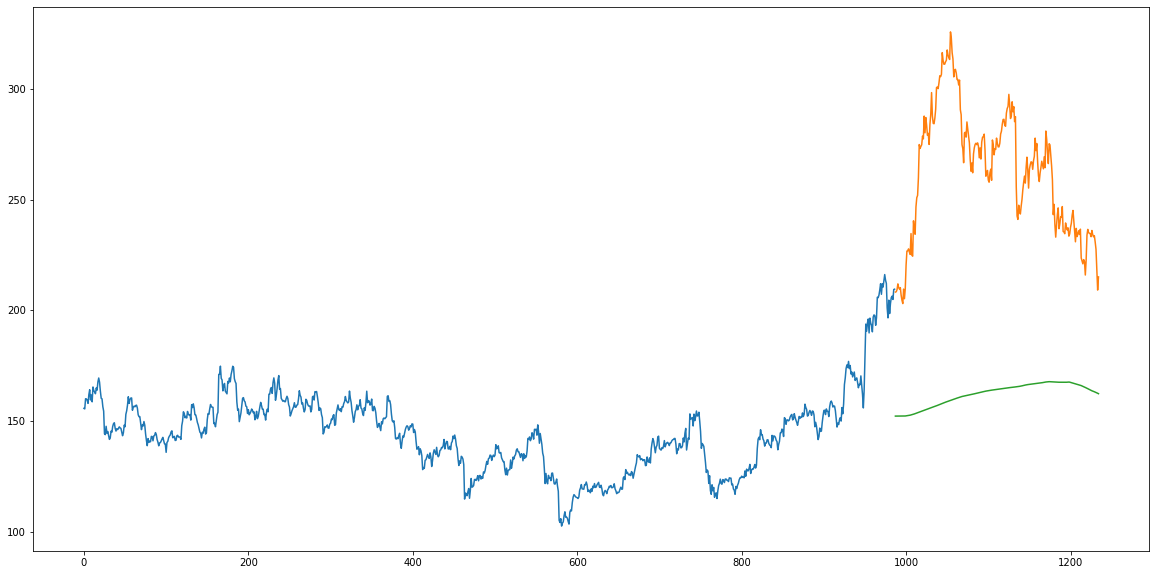

In [19]:
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])

In [0]:
#Linear reg
df['Date'] = pd.to_datetime(df.Date,format = '%Y-%m-%d')
df.index = df['Date']

data = df.sort_index(ascending=True)
